# Learning Keras with Toy Models
by miestgo@gmail.com

### Objective

Create a simple neural network that computes the square root of a number.


In [1]:
# Load libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [2]:
# Generate random data to train the network
data = np.floor(np.random.randint(10000,size=5000))
target = np.sqrt(data)

# Visualize our data
print(data)
print(target)

[ 437. 7754. 7964. ... 8386. 1786. 2173.]
[20.90454496 88.05679985 89.24124607 ... 91.57510579 42.26109322
 46.61544808]


In [3]:
# I won't normalize features since I think it could impact the results 
# negatively. I should actually try to see what happens if I normalize.

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(1,)),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model


In [4]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________
Training model, each point represents an epoch.

......................................................................

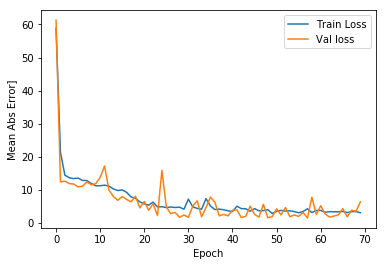

In [5]:
# Build and execute model.
model = build_model()
model.summary()
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='mean_absolute_error', patience=20)

EPOCHS = 200
print("Training model, each point represents an epoch.")
history = model.fit(data, target, epochs=EPOCHS,
                    callbacks=[early_stop, PrintDot()],validation_split=0.33,verbose=0)
plot_history(history)

In [6]:
test_labels = np.array([1,2,3,4,5,6,7,8,9,10])
test_data = np.square(test_labels)

In [7]:
test_predictions = model.predict(test_data)

print(test_predictions)

[[-0.5178957 ]
 [ 0.25055218]
 [ 1.4525394 ]
 [ 3.062889  ]
 [ 4.362069  ]
 [ 5.2213764 ]
 [ 6.236924  ]
 [ 7.4087067 ]
 [ 8.493866  ]
 [ 9.492918  ]]
